In [2]:
import pandas as pd

In [50]:
df_telephone = pd.read_csv('telephone.csv')

In [51]:
df_telephone

,id,date_appel,entite,famille,nombre_entrants_corrige
0,12,2019-01-02,Entite 1,F2,165
1,13,2019-01-02,Entite 1,F3,54
2,14,2019-01-02,Entite 1,F4,1
3,15,2019-01-02,Entite 1,F5,99
4,16,2019-01-02,Entite 1,F6,1487
...,...,...,...,...,...
23778,23790,2023-02-15,Entite 5,F2,"708,32971246"
23779,23791,2023-02-15,Entite 5,F3,"738,93587571"
23780,23792,2023-02-15,Entite 5,F5,"463,64218009"
23781,23793,2023-02-15,Entite 5,F6,"694,32144026"


In [52]:
print(df_telephone.dtypes)


id                          int64
date_appel                 object
entite                     object
famille                    object
nombre_entrants_corrige    object
dtype: object


In [53]:
df_telephone['nombre_entrants_corrige'] = df_telephone['nombre_entrants_corrige'].str.replace(',', '.').astype(float)


In [54]:
gb_tel_entite = df_telephone.groupby(['date_appel','entite']).sum('nombre_entrants_corrige')
gb_tel_entite


id  nombre_entrants_corrige
date_appel entite                                   
2019-01-02 Entite 1      87              2614.000000
           Entite 2      57              2415.000000
           Entite 3      66              1122.000000
           Entite 4      49               379.000000
           Entite 5     171              6491.000000
...                     ...                      ...
2023-02-15 Entite 1  142665              2646.641323
           Entite 2   71346              2712.156336
           Entite 3   71355               711.186567
           Entite 4   47575               167.283333
           Entite 5  142749              5870.709578

[5971 rows x 2 columns]

In [55]:
gb_tel_famille = df_telephone.groupby(['date_appel','famille'])['nombre_entrants_corrige'].sum()
gb_tel_famille


date_appel  famille
2019-01-02  F1         1481.000000
            F2         1849.000000
            F3          133.000000
            F4            1.000000
            F5         1017.000000
                          ...     
2023-02-15  F2         1405.922695
            F3         2054.951362
            F5          680.215864
            F6         2094.340620
            F7         4428.696348
Name: nombre_entrants_corrige, Length: 7647, dtype: float64

In [56]:
gb_tel_entite_famille = df_telephone.groupby(['date_appel','entite','famille']).sum('nombre_entrants_corrige')
gb_tel_entite_famille


id  nombre_entrants_corrige
date_appel entite   famille                                
2019-01-02 Entite 1 F2          12               165.000000
                    F3          13                54.000000
                    F4          14                 1.000000
                    F5          15                99.000000
                    F6          16              1487.000000
...                            ...                      ...
2023-02-15 Entite 5 F2       23790               708.329712
                    F3       23791               738.935876
                    F5       23792               463.642180
                    F6       23793               694.321440
                    F7       23794              3248.480370

[23783 rows x 2 columns]

In [57]:
df_gb_tel_entite_famille = gb_tel_entite_famille.reset_index().set_index('date_appel')
df_gb_tel_entite_famille

,entite,famille,id,nombre_entrants_corrige
date_appel,,,,
2019-01-02,Entite 1,F2,12,165.000000
2019-01-02,Entite 1,F3,13,54.000000
2019-01-02,Entite 1,F4,14,1.000000
2019-01-02,Entite 1,F5,15,99.000000
2019-01-02,Entite 1,F6,16,1487.000000
...,...,...,...,...
2023-02-15,Entite 5,F2,23790,708.329712
2023-02-15,Entite 5,F3,23791,738.935876
2023-02-15,Entite 5,F5,23792,463.642180


In [58]:
import pandas as pd

df_telephone['date_appel'] = pd.to_datetime(df_telephone['date_appel'])  # Convertit la colonne 'Date' en objets datetime

# Extraction des informations pour chaque jour
df_telephone['Day'] = df_telephone['date_appel'].dt.day

# Extraction des informations pour chaque mois
df_telephone['Month'] = df_telephone['date_appel'].dt.month

# Extraction des informations pour chaque année
df_telephone['Year'] = df_telephone['date_appel'].dt.year


In [59]:
df_telephone

,id,date_appel,entite,famille,nombre_entrants_corrige,Day,Month,Year
0,12,2019-01-02,Entite 1,F2,165.000000,2,1,2019
1,13,2019-01-02,Entite 1,F3,54.000000,2,1,2019
2,14,2019-01-02,Entite 1,F4,1.000000,2,1,2019
3,15,2019-01-02,Entite 1,F5,99.000000,2,1,2019
4,16,2019-01-02,Entite 1,F6,1487.000000,2,1,2019
...,...,...,...,...,...,...,...,...
23778,23790,2023-02-15,Entite 5,F2,708.329712,15,2,2023
23779,23791,2023-02-15,Entite 5,F3,738.935876,15,2,2023
23780,23792,2023-02-15,Entite 5,F5,463.642180,15,2,2023
23781,23793,2023-02-15,Entite 5,F6,694.321440,15,2,2023


In [60]:
import pandas as pd

# Supposons que vous ayez une colonne "date" contenant les dates dans votre DataFrame
df_telephone['jour_semaine'] = df_telephone['date_appel'].dt.day_name()

# Affichage du DataFrame avec la nouvelle colonne "jour_semaine"
print(df_telephone)


          id date_appel    entite famille  nombre_entrants_corrige  Day  \
0         12 2019-01-02  Entite 1      F2               165.000000    2   
1         13 2019-01-02  Entite 1      F3                54.000000    2   
2         14 2019-01-02  Entite 1      F4                 1.000000    2   
3         15 2019-01-02  Entite 1      F5                99.000000    2   
4         16 2019-01-02  Entite 1      F6              1487.000000    2   
...      ...        ...       ...     ...                      ...  ...   
23778  23790 2023-02-15  Entite 5      F2               708.329712   15   
23779  23791 2023-02-15  Entite 5      F3               738.935876   15   
23780  23792 2023-02-15  Entite 5      F5               463.642180   15   
23781  23793 2023-02-15  Entite 5      F6               694.321440   15   
23782  23794 2023-02-15  Entite 5      F7              3248.480370   15   

       Month  Year jour_semaine  
0          1  2019    Wednesday  
1          1  2019    Wednesday

In [61]:
df_telephone["jour_semaine"].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Monday', 'Tuesday'],
      dtype=object)

In [62]:
df_samedi =df_telephone.loc[(df_telephone['jour_semaine'] == 'Saturday') 
                  & (df_telephone['date_appel'].dt.year.isin([2021, 2022]))  ]



In [63]:
df_monthly = df_telephone.groupby('Month').sum()  # Regroupe par mois et calcule la somme des autres colonnes


/tmp/ipykernel_7366/469380516.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df_telephone.groupby('Month').sum()  # Regroupe par mois et calcule la somme des autres colonnes


/tmp/ipykernel_7366/3155705348.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df_telephone.groupby(['Year', 'Month']).sum()


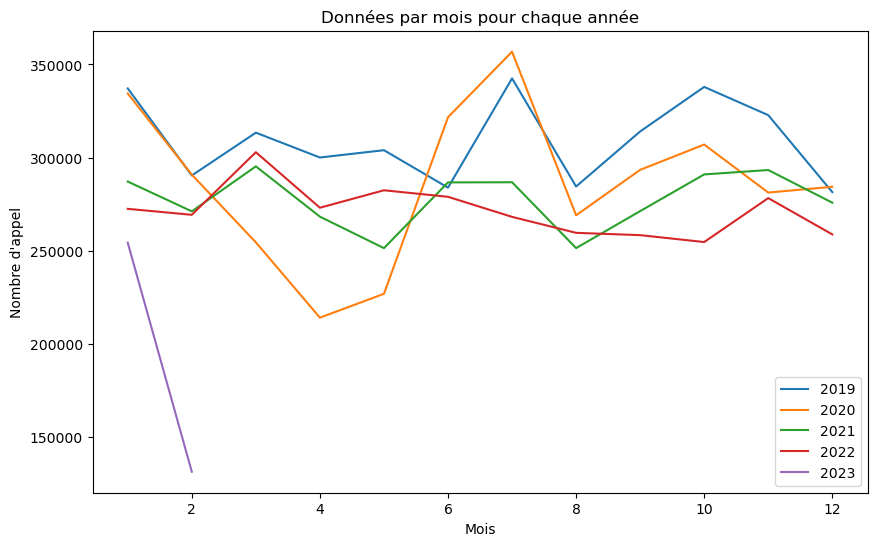

In [64]:

import matplotlib.pyplot as plt

# Supposons que vous avez un DataFrame 'df_telephone' contenant les données avec une colonne 'Date' au format datetime

# Création des colonnes 'Year' et 'Month'
df_telephone['Year'] = df_telephone["date_appel"].dt.year
df_telephone['Month'] = df_telephone["date_appel"].dt.month

# Groupement des données par année et mois, et calcul de la somme des autres colonnes
df_monthly = df_telephone.groupby(['Year', 'Month']).sum()

# Réinitialisation de l'index pour pouvoir utiliser les colonnes 'Year' et 'Month' dans le tracé
df_monthly = df_monthly.reset_index()

# Tracé du graphique
plt.figure(figsize=(10, 6))
for year in df_monthly['Year'].unique():
    data_year = df_monthly[df_monthly['Year'] == year]
    plt.plot(data_year['Month'], data_year['nombre_entrants_corrige'], label=str(year))

plt.xlabel('Mois')
plt.ylabel("Nombre d'appel")
plt.title('Données par mois pour chaque année')
plt.legend()
plt.show()

In [4]:

import matplotlib.pyplot as plt

# Supposons que vous avez un DataFrame 'df_mail' contenant les données avec une colonne 'Date' au format datetime
df_mail = pd.read_csv("email.csv")
# Création des colonnes 'Year' et 'Month'
df_mail['Year'] = df_mail["nb_recus"].dt.year
df_mail['Month'] = df_mail["nb_recus"].dt.month

# Groupement des données par année et mois, et calcul de la somme des autres colonnes
df_monthly = df_mail.groupby(['Year', 'Month']).sum()

# Réinitialisation de l'index pour pouvoir utiliser les colonnes 'Year' et 'Month' dans le tracé
df_monthly = df_monthly.reset_index()

# Tracé du graphique
plt.figure(figsize=(10, 6))
for year in df_monthly['Year'].unique():
    data_year = df_monthly[df_monthly['Year'] == year]
    plt.plot(data_year['Month'], data_year['nb_recus'], label=str(year))

plt.xlabel('Mois')
plt.ylabel("Nombre d'appel")
plt.title('Données par mois pour chaque année')
plt.legend()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [65]:
df_telephone['Week'] = df_telephone['date_appel'].dt.isocalendar().week
df_telephone



,id,date_appel,entite,famille,nombre_entrants_corrige,Day,Month,Year,jour_semaine,Week
0,12,2019-01-02,Entite 1,F2,165.000000,2,1,2019,Wednesday,1
1,13,2019-01-02,Entite 1,F3,54.000000,2,1,2019,Wednesday,1
2,14,2019-01-02,Entite 1,F4,1.000000,2,1,2019,Wednesday,1
3,15,2019-01-02,Entite 1,F5,99.000000,2,1,2019,Wednesday,1
4,16,2019-01-02,Entite 1,F6,1487.000000,2,1,2019,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...
23778,23790,2023-02-15,Entite 5,F2,708.329712,15,2,2023,Wednesday,7
23779,23791,2023-02-15,Entite 5,F3,738.935876,15,2,2023,Wednesday,7
23780,23792,2023-02-15,Entite 5,F5,463.642180,15,2,2023,Wednesday,7
23781,23793,2023-02-15,Entite 5,F6,694.321440,15,2,2023,Wednesday,7


In [66]:
df_telephone[df_telephone['date_appel'] == '2019-05-08']


,id,date_appel,entite,famille,nombre_entrants_corrige,Day,Month,Year,jour_semaine,Week


In [67]:
import holidays

# Obtenez les jours fériés en France pour une année spécifique
annees = [2019,2020,2021,2022,2023]
jours_feries = []

# Enregistrez les dates des jours fériés dans une liste
for annee in annees:
    jours_feries_annee = holidays.Morocco(years=annee)
    dates_annee = list(jours_feries_annee.keys())
    jours_feries.extend(dates_annee)

# Utilisez la liste des jours fériés comme vous le souhaitez
print(jours_feries)


[datetime.date(2019, 1, 1), datetime.date(2019, 1, 11), datetime.date(2019, 5, 1), datetime.date(2019, 7, 30), datetime.date(2019, 8, 14), datetime.date(2019, 8, 20), datetime.date(2019, 8, 21), datetime.date(2019, 11, 6), datetime.date(2019, 11, 18), datetime.date(2019, 6, 4), datetime.date(2019, 6, 5), datetime.date(2019, 8, 11), datetime.date(2019, 8, 12), datetime.date(2019, 8, 31), datetime.date(2019, 11, 9), datetime.date(2019, 11, 10), datetime.date(2020, 1, 1), datetime.date(2020, 1, 11), datetime.date(2020, 5, 1), datetime.date(2020, 7, 30), datetime.date(2020, 8, 14), datetime.date(2020, 8, 20), datetime.date(2020, 8, 21), datetime.date(2020, 11, 6), datetime.date(2020, 11, 18), datetime.date(2020, 5, 24), datetime.date(2020, 5, 25), datetime.date(2020, 7, 31), datetime.date(2020, 8, 1), datetime.date(2020, 10, 29), datetime.date(2020, 10, 30), datetime.date(2021, 1, 1), datetime.date(2021, 1, 11), datetime.date(2021, 5, 1), datetime.date(2021, 7, 30), datetime.date(2021, 8, 

In [68]:
df_telephone.loc[df_telephone['date_appel'].isin(jours_feries)]

,id,date_appel,entite,famille,nombre_entrants_corrige,Day,Month,Year,jour_semaine,Week
152,164,2019-01-11,Entite 1,F2,176.000000,11,1,2019,Friday,2
153,165,2019-01-11,Entite 1,F3,266.000000,11,1,2019,Friday,2
154,166,2019-01-11,Entite 1,F4,2.000000,11,1,2019,Friday,2
155,167,2019-01-11,Entite 1,F5,117.000000,11,1,2019,Friday,2
156,168,2019-01-11,Entite 1,F6,1548.000000,11,1,2019,Friday,2
...,...,...,...,...,...,...,...,...,...,...
23201,23213,2023-01-11,Entite 5,F2,741.769672,11,1,2023,Wednesday,2
23202,23214,2023-01-11,Entite 5,F3,651.339367,11,1,2023,Wednesday,2
23203,23215,2023-01-11,Entite 5,F5,501.243243,11,1,2023,Wednesday,2
23204,23216,2023-01-11,Entite 5,F6,729.325071,11,1,2023,Wednesday,2


In [69]:
import holidays

# Obtenez les jours fériés au Maroc pour une année spécifique
annee = 2022
jours_feries = holidays.Morocco(years=annee)

# Affichez les jours fériés avec leur nom
for date, name in sorted(jours_feries.items()):
    print(f"{date}: {name}")


2022-01-01: Nouvel an - Premier janvier
2022-01-11: Commémoration de la présentation du manifeste de l'indépendance
2022-05-01: Fête du Travail
2022-05-02: Eid al-Fitr* (*estimated)
2022-05-03: Eid al-Fitr* (*estimated)
2022-07-09: Eid al-Adha* (*estimated)
2022-07-10: Eid al-Adha* (*estimated)
2022-07-30: 1er Moharram* (*estimated); Fête du Trône
2022-08-14: Journée de Oued Ed-Dahab
2022-08-20: Commémoration de la révolution du Roi et du peuple
2022-08-21: Fête de la jeunesse
2022-10-08: Aid al Mawlid Annabawi* (*estimated)
2022-10-09: Aid al Mawlid Annabawi* (*estimated)
2022-11-06: Marche verte
2022-11-18: Fête de l'indépendance


In [2]:
import pandas as pd

In [11]:
df_tel = pd.read_csv(f'telephone.csv', index_col="date", parse_dates = True, dayfirst=True)
liste_famille = df_tel.famille.unique()
liste_entite = df_tel.entite.unique()

df_freq = pd.DataFrame(columns = ['entite', 'famille','nb_recus'])

for i, famille in enumerate(liste_famille):
    for j, entite in enumerate(liste_entite):
        df = df_tel[(df_tel["entite"] == entite)& (df_tel["famille"] == famille)]
        df = df.asfreq('d')
        df.entite = df.entite.fillna(entite)
        df.famille = df.famille.fillna(famille)
        df.nb_recus = df.nb_recus.fillna(0)
        df_freq = pd.concat([df_freq,df])

df_freq = df_freq.sort_values(['entite','famille'],ascending = True)
df_freq = df_freq.reset_index(names="date")

df_freq
df_freq.to_csv('email.csv', index = False)

ValueError: 'date' is not in list